In [3]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('hermosillo.txt', skiprows=19, sep='\s+',header=None,names=["DD/MM/YY","PRECIP","EVAP","TMAX","TMIN"])
# "Shift + Enter"



In [5]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
#FECHA
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df0 = df0.drop(['DD/MM/YY'], 1)
#Presipitación
#df0['PRECIPITACIÓN'] = pd.to_datefloat(df0.apply(lambda x: x['PRECIP'], 1), dayfirst=True)
#df0 = df0.drop(['PRECIP'], 1)



In [6]:
#Crea una columna de años
df0['MES'] = pd.DatetimeIndex(df0["FECHA"]).month

#Crea una columa de años
df0["AÑO"] = pd.DatetimeIndex(df0["FECHA"]).year

#Crea una columa de los dias
df0["DIA"] = pd.DatetimeIndex(df0["FECHA"]).day


In [7]:
#Guarda en un arreglo la precipitacion acumulada promedio por año 
df1 = df0.set_index('FECHA').resample('Y')["PRECIP"].mean()

In [8]:
#Guarda en un arreglo la precipitacion acumulada promedio por mes
df2 = df0.set_index('FECHA').resample('M')["PRECIP"].mean()


In [9]:
dfmes = pd.DataFrame()
años = len(df0['AÑO'].unique())
dfmes["MES"] = [i for i in range(1, 13)]
dfmes["PRECIP"] = [df0[df0.MES==i].PRECIP.mean() for i in range (1,13)]
dfmes["TMAX"] = [df0[df0.MES==i].TMAX.mean() for i in range (1,13)]
dfmes["TMIN"] = [df0[df0.MES==i].TMIN.mean() for i in range (1,13)]

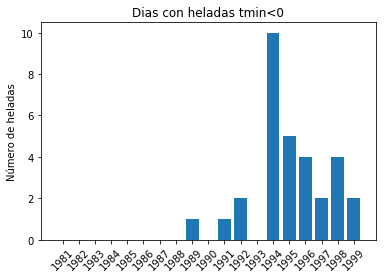

In [10]:
#Número de días con heladas por año (FD: Tmin < 0ºC)
#Dias con heladas tmin<0




#data1=[]
#data2=[]
#for i in range(0, 19):
#    init=1981
#    count=init + i #for i in range(0, 38)]
#    j=df0[df0.AÑO==(1974+i)].TMIN
#    ji=len([1 for i in j if i < 0])
#    data1.append(count)
#    data2.append(ji)
#df3=pd.DataFrame({"AÑO" : data1,"TMIN" : data2})   
#
#x = df3.AÑO
#y=np.arange(len(x))
#TMIN= df3.TMIN
# 
#plt.bar(y, TMIN, align='center')
#plt.xticks(y, x,rotation=45)
#plt.ylabel('Número de heladas')
#plt.title("Dias con heladas tmin<0")
#plt.show()